In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


[Text(0.5, 1.0, 'Imbalanced Correlation Matrix')]

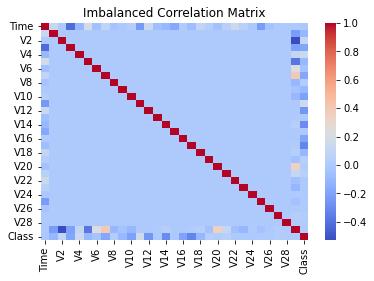

In [4]:
#it is hard to observe the right correlation using the imbalanced data
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm').set(title='Imbalanced Correlation Matrix')

In [5]:
#check out if the data set is imbalanced: yes, and need undersampling or oversampling
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# check if the data set is imbalanced

from decimal import Decimal

def fraud_percent(df):
    
    fraud_num = int(df[df['Class']==1]['Class'].value_counts())
    legal_num = int(df[df['Class']==0]['Class'].value_counts())
    total = fraud_num+legal_num
    fraud_percent = Decimal(fraud_num/total).quantize(Decimal("0.0001"), rounding = "ROUND_HALF_UP")
    
    if fraud_percent<0.01:
        print(fraud_percent)
        print('Extremely imbalanced')
    elif fraud_percent>0.01 and fraud_percent<0.2:
        print(fraud_percent)
        print('Moderate imbalanced')
    elif fraud_percent>0.2 and fraud_percent<=0.4:
        print(fraud_percent)
        print('mild imbalanced')
    else:
        print(fraud_percent)
        print('No Imbalanced Issue')
        

    print('Fraud',round(df['Class'].value_counts()[1]*100/len(df),2),'% of the data set')
    print('Legitimate',round(df['Class'].value_counts()[0]*100/len(df),2),'% of the data set')

In [5]:
fraud_percent(df)

0.0017
Extremely imbalanced
Fraud 0.17 % of the data set
Legitimate 99.83 % of the data set


In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

(array([ 5595.,  2960.,  1955.,  2614.,  4413.,  9928., 13153., 13011.,
        12362., 12587., 12630., 13333., 13390., 16144., 10709.,  5114.,
         3214.,  1817.,  2128.,  5465.,  9568., 13455., 12853., 12643.,
        13810., 13791., 13178., 12295., 12234.,  8458.]),
 array([     0.        ,   5759.73333333,  11519.46666667,  17279.2       ,
         23038.93333333,  28798.66666667,  34558.4       ,  40318.13333333,
         46077.86666667,  51837.6       ,  57597.33333333,  63357.06666667,
         69116.8       ,  74876.53333333,  80636.26666667,  86396.        ,
         92155.73333333,  97915.46666667, 103675.2       , 109434.93333333,
        115194.66666667, 120954.4       , 126714.13333333, 132473.86666667,
        138233.6       , 143993.33333333, 149753.06666667, 155512.8       ,
        161272.53333333, 167032.26666667, 172792.        ]),
 <BarContainer object of 30 artists>)

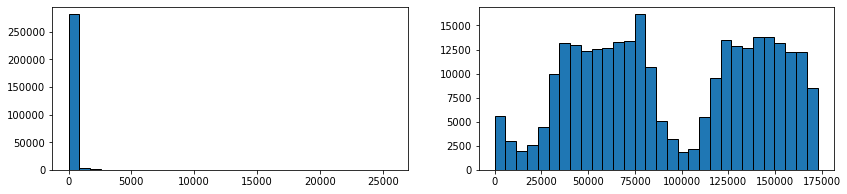

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(14,3))

amount_value = df['Amount'].values
time_value = df['Time'].values

axs[0].hist(amount_value, bins=30,ec='black')

axs[1].hist(time_value, bins=30,ec='black')

In [17]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [10]:
df.isnull().sum().max()

0

Text(0, 0.5, 'Frequency')

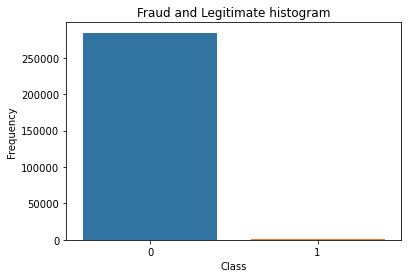

In [8]:
sns.countplot(data=df,x=df['Class'])
plt.title("Fraud and Legitimate histogram")
plt.ylabel("Frequency")

In [9]:
#feature scaling, use robust scaler instead of others

from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['Scaled_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [11]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


[Text(0.5, 1.0, 'After Feature Scaling Correlation Matrix')]

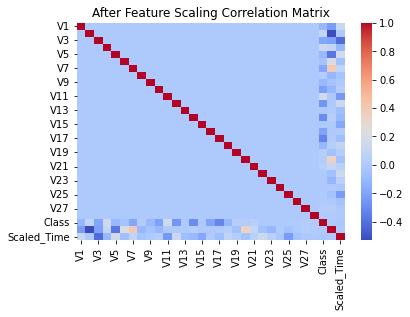

In [13]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm').set(title='After Feature Scaling Correlation Matrix')

In [14]:
#split the data first
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [16]:
print("training dataset%: ", len(X_train)/(len(X_train)+len(X_test)))
print("testing dataset%: ", len(X_test)/(len(X_train)+len(X_test)))
print("Total amount: ", len(X_train)+len(X_test))

training dataset%:  0.6999968399653098
testing dataset%:  0.3000031600346902
Total amount:  284807


In [17]:
#prepare for resampling of the original data set(not the training or testing data set)
#shuffle the data first
df = df.sample(frac=1)

In [18]:
#undersampling the majority data set(class=1)
#resampling the data: undersampling
#the amount of data in class=1 is 492, so I would like to make the data of class=0 
#also equals to 492, to achieve a 50-50 ratio.
fraud_data = df.loc[df['Class'] == 1]
legal_data = df.loc[df['Class'] == 0][:492]

new_data = pd.concat([fraud_data,legal_data]).sample(frac=1,random_state=42)

In [19]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
37751,-4.595197,2.229887,-1.217216,0.171169,-1.658871,0.937784,-1.376289,2.849246,0.145644,-0.179934,...,0.038303,0.099048,-0.593114,-0.065756,0.336036,-0.040334,-0.209780,0,0.544260,-0.535768
249239,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1,15.021170,0.817878
103770,0.846536,-1.513559,0.906357,-0.550623,-1.362981,0.838100,-1.127663,0.364883,-0.429749,0.488081,...,1.227738,-0.232630,-0.216961,0.216016,-0.026337,0.043982,0.043485,0,2.585063,-0.186868
238366,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,-3.263007,...,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,1,-0.279466,0.763026
123270,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,0.009872,-1.925278,...,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,1,-0.293440,-0.091930


In [20]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

[Text(0.5, 1.0, 'Balanced Correlation Matrix')]

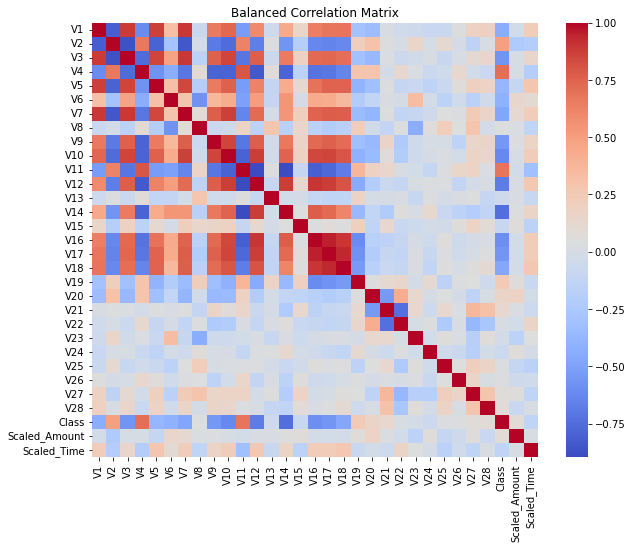

In [21]:
plt.figure(figsize=(10,8))
new_corr = new_data.corr()
sns.heatmap(new_corr,cmap='coolwarm').set(title='Balanced Correlation Matrix')

In [22]:
new_data.corr()['Class'].sort_values(ascending=False)

Class            1.000000
V4               0.706210
V11              0.683126
V2               0.489149
V19              0.251220
V20              0.157834
V21              0.130599
V28              0.084254
Scaled_Amount    0.081170
V27              0.073014
V8               0.049002
V26              0.042015
V25              0.031010
V22              0.010161
V23             -0.019287
V13             -0.047704
V24             -0.074231
V15             -0.092213
Scaled_Time     -0.135610
V5              -0.377024
V6              -0.406055
V1              -0.436421
V18             -0.471291
V7              -0.479706
V9              -0.551858
V17             -0.560476
V3              -0.569245
V16             -0.595168
V10             -0.625050
V12             -0.682921
V14             -0.748421
Name: Class, dtype: float64

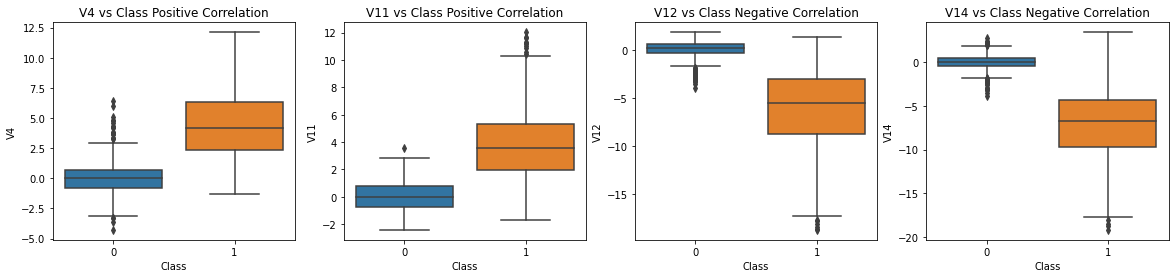

In [23]:
#check the outliers for V4, V11, V12, V14
#V12 and V14 are negative correlation, V4 and V11 are positive correlation

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V4", data=new_data,  ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_data,  ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V12", data=new_data, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=new_data,  ax=axes[3])
axes[3].set_title('V14 vs Class Negative Correlation')

plt.show()

/var/folders/q9/6mm57k9n2wj123z0xkfztngr0000gn/T/ipykernel_34847/3137219587.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v4_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/var/folders/q9/6mm57k9n2wj123z0xkfztngr0000gn/T/ipykernel_34847/3137219587.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

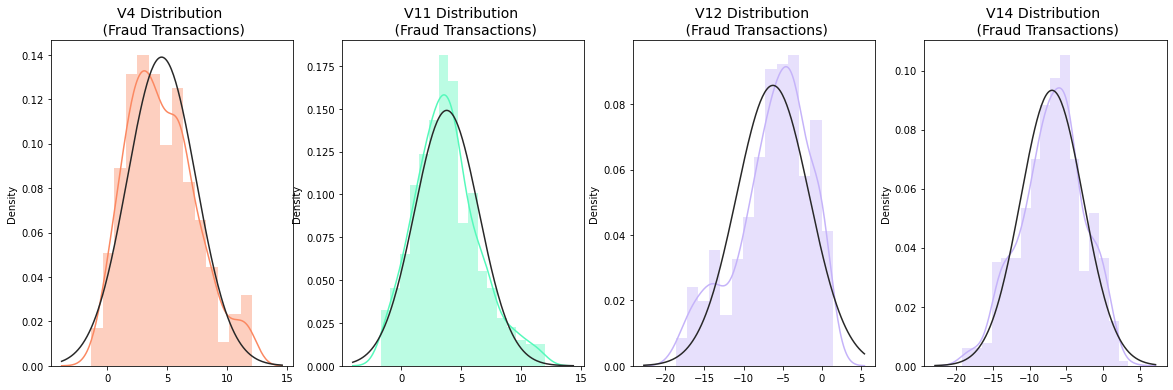

In [24]:
#visualiza the distribution for V4, V11, V12, V14
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v4_fraud_dist = new_data['V4'].loc[new_data['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = new_data['V11'].loc[new_data['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)


v12_fraud_dist = new_data['V12'].loc[new_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_data['V14'].loc[new_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [25]:
#check out the outliers for V4, V11, V12, V14
#V14 Outliers (Highest Negative Correlated with Labels)

v14_fraud = new_data['V14'].loc[new_data['Class'] == 1].values
q1, q3 = np.quantile(v14_fraud, 0.25), np.quantile(v14_fraud, 0.75)
print('Quartile 25: {} | Quartile 75: {}'.format(q1, q3))
v14_iqr = q3 - q1
print('iqr: {}'.format(v14_iqr))

#V14 Outliers 
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q1 - v14_cut_off, q3 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

v14_outliers = [i for i in v14_fraud 
            if i < v14_lower or i > v14_upper]
print('V14 Outliers for Fraud Cases: {}'.format(len(v14_outliers)))
print('V14 outliers:{}'.format(v14_outliers))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]


In [26]:
new_data = new_data.drop(new_data[(new_data['V14'] > v14_upper) | (new_data['V14'] < v14_lower)].index)

In [27]:
#check out the outliers for V4, V11, V12, V14
#V4 Outliers (Highest Negative Correlated with Labels)

v4_fraud = new_data['V4'].loc[new_data['Class'] == 1].values
q1, q3 = np.quantile(v4_fraud, 0.25), np.quantile(v4_fraud, 0.75)
print('Quartile 25: {} | Quartile 75: {}'.format(q1, q3))
v4_iqr = q3 - q1
print('iqr: {}'.format(v4_iqr))

#V4 Outliers 
v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q1 - v4_cut_off, q3 + v4_cut_off
print('Cut Off: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))

v4_outliers = [i for i in v4_fraud 
            if i < v4_lower or i > v4_upper]
print('V4 Outliers for Fraud Cases: {}'.format(len(v4_outliers)))
print('V4 outliers:{}'.format(v4_outliers))

Quartile 25: 2.3515833217839823 | Quartile 75: 6.31301804690876
iqr: 3.9614347251247777
Cut Off: 5.942152087687166
V4 Lower: -3.5905687659031837
V4 Upper: 12.255170134595925
V4 Outliers for Fraud Cases: 0
V4 outliers:[]


In [28]:
new_data = new_data.drop(new_data[(new_data['V4'] > v4_upper) | (new_data['V4'] < v4_lower)].index)

In [29]:
#check out the outliers for V4, V11, V12, V14
#V11 Outliers (Highest Negative Correlated with Labels)

v11_fraud = new_data['V11'].loc[new_data['Class'] == 1].values
q1, q3 = np.quantile(v11_fraud, 0.25), np.quantile(v11_fraud, 0.75)
print('Quartile 25: {} | Quartile 75: {}'.format(q1, q3))
v11_iqr = q3 - q1
print('iqr: {}'.format(v11_iqr))

#V4 Outliers 
v11_cut_off = v11_iqr * 1.5
v11_lower, v11_upper = q1 - v11_cut_off, q3 + v11_cut_off
print('Cut Off: {}'.format(v11_cut_off))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

v11_outliers = [i for i in v11_fraud 
            if i < v11_lower or i > v11_upper]
print('V11 Outliers for Fraud Cases: {}'.format(len(v11_outliers)))
print('V11 outliers:{}'.format(v11_outliers))

Quartile 25: 1.96515158641763 | Quartile 75: 5.266904805473625
iqr: 3.301753219055995
Cut Off: 4.9526298285839925
V11 Lower: -2.9874782421663624
V11 Upper: 10.219534634057617
V11 Outliers for Fraud Cases: 7
V11 outliers:[11.0270590938161, 11.2779207278067, 11.1524905985837, 10.446846814514, 10.2777688628065, 10.5452629545898, 10.8530116481991]


In [30]:
new_data = new_data.drop(new_data[(new_data['V11'] > v11_upper) | (new_data['V11'] < v11_lower)].index)

In [31]:
#check out the outliers for V4, V11, V12, V14
#V12 Outliers (Highest Negative Correlated with Labels)

v12_fraud = new_data['V12'].loc[new_data['Class'] == 1].values
q1, q3 = np.quantile(v12_fraud, 0.25), np.quantile(v12_fraud, 0.75)
print('Quartile 25: {} | Quartile 75: {}'.format(q1, q3))
v12_iqr = q3 - q1
print('iqr: {}'.format(v12_iqr))

#V4 Outliers 
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q1 - v12_cut_off, q3 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

v12_outliers = [i for i in v12_fraud 
            if i < v12_lower or i > v12_upper]
print('V12 Outliers for Fraud Cases: {}'.format(len(v12_outliers)))
print('V12 outliers:{}'.format(v12_outliers))

Quartile 25: -8.57676143258937 | Quartile 75: -2.85427542751023
iqr: 5.722486005079141
Cut Off: 8.583729007618711
V12 Lower: -17.16049044020808
V12 Upper: 5.729453580108482
V12 Outliers for Fraud Cases: 6
V12 outliers:[-18.5536970096458, -18.0475965708216, -17.1829184301947, -18.6837146333443, -17.1829184301947, -18.4311310279993]


In [32]:
new_data = new_data.drop(new_data[(new_data['V12'] > v12_upper) | (new_data['V12'] < v12_lower)].index)

In [33]:
print('Number of data after outliers removal: {}'.format(len(new_data)))

Number of data after outliers removal: 965


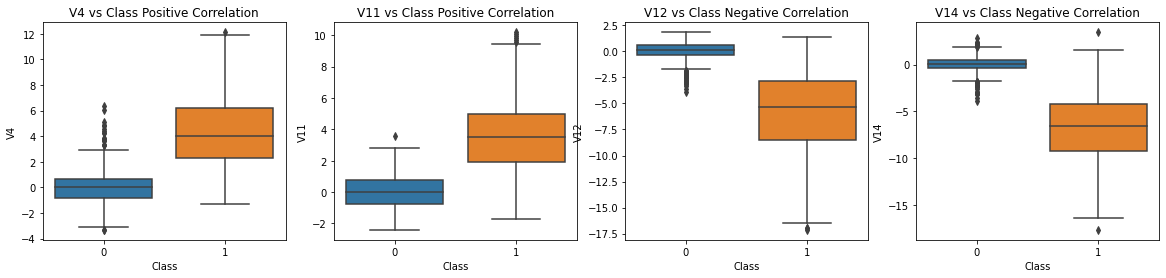

In [36]:
#check the boxplots for V4, V11, V12, V14 after removing the outliers
#V12 and V14 are negative correlation, V4 and V11 are positive correlation

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V4", data=new_data,  ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_data,  ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V12", data=new_data, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=new_data,  ax=axes[3])
axes[3].set_title('V14 vs Class Negative Correlation')

plt.show()

In [37]:
#train test split
X = new_data.drop('Class', axis=1)
y = new_data['Class']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#turn the format into array for classification models
#returns a view object that displays a list of all the values in the dictionary.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [41]:
#training score
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


In [42]:
#GridSearchCV is the process of performing hyperparameter tuning 
#in order to determine the optimal values for a given model.
from sklearn.model_selection import GridSearchCV

In [43]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

/Users/rongrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rongrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [44]:
log_reg = grid_log_reg.best_estimator_

In [45]:
# KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

In [46]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

In [47]:
#RandomForest Classifier

forest_params = {'max_depth': list(range(10, 15)), 'max_features': list(range(1,14))}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params, cv = 10, scoring='accuracy')
grid_forest.fit(X_train, y_train)
forest_clf = grid_forest.best_estimator_

# print(clf.best_params_)

In [48]:
#Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [49]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Rndom Forest Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/rongrong/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

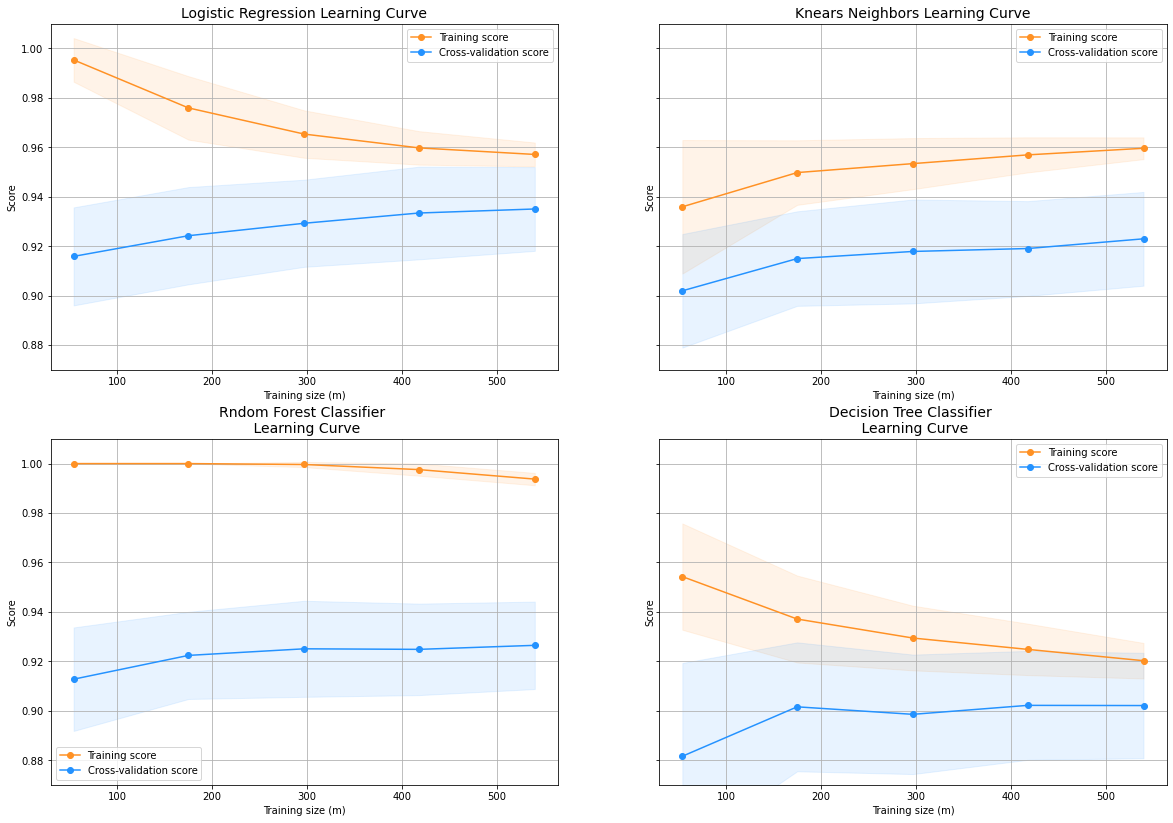

In [50]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, forest_clf, tree_clf,  X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [51]:
#ROC Cruve
# Create a DataFrame with all the scores and the classifiers names.

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,method="decision_function")
                            
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)
                             
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5 )

In [52]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, forest_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.975367944079525
KNears Neighbors:  0.9236669710913625
Random Forest Classifier:  0.9295461730303136
Decision Tree Classifier:  0.9080271523411431


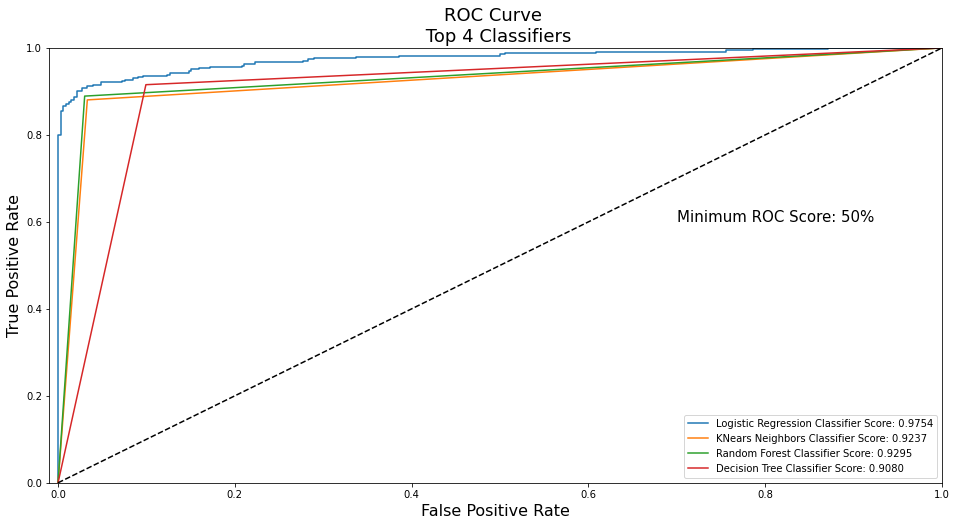

In [53]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
forest_fpr, forest_tpr, forest_threshold = roc_curve(y_train, forest_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(forest_fpr, forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, forest_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score: 50%', xy=(0.5, 0.5), xytext=(0.7, 0.6),fontsize=15)            
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr, tree_fpr, tree_tpr)
plt.show()

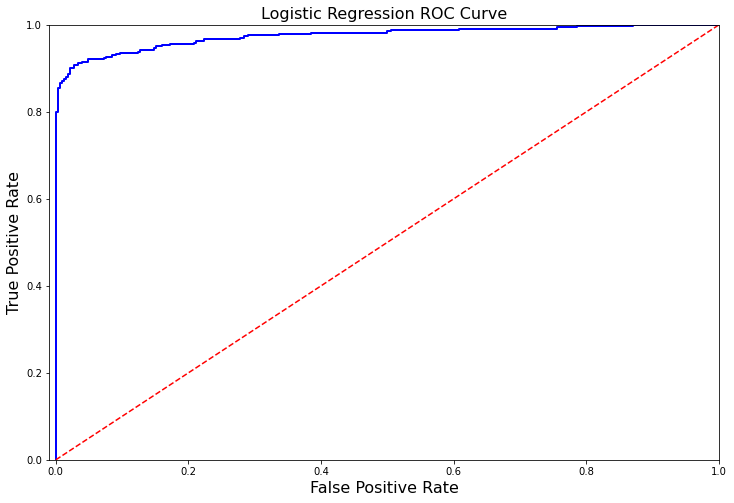

In [54]:
#to focus on the logistic regression model
plt.figure(figsize=(12,8))
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
    
plt.show()

In [55]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [56]:
y_pred_ = log_reg.predict(X_test)

In [57]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric of Logistic Regression Model :  0.9015151515151515


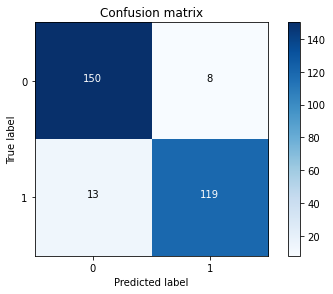

In [58]:
cnf_matrix = confusion_matrix(y_test,y_pred_)
np.set_printoptions(precision=2)

print("Recall metric of Logistic Regression Model : ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [59]:
len(y_test)

290

In [60]:
#logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       158
           1       0.94      0.90      0.92       132

    accuracy                           0.93       290
   macro avg       0.93      0.93      0.93       290
weighted avg       0.93      0.93      0.93       290



In [61]:
#other algorithms
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_forest = forest_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

In [63]:
#KNN
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knear))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       158
           1       0.97      0.89      0.93       132

    accuracy                           0.94       290
   macro avg       0.94      0.93      0.94       290
weighted avg       0.94      0.94      0.94       290



In [64]:
#decision tree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       158
           1       0.85      0.91      0.88       132

    accuracy                           0.89       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.89      0.89      0.89       290



In [65]:
#forest
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       158
           1       0.96      0.90      0.93       132

    accuracy                           0.94       290
   macro avg       0.94      0.93      0.94       290
weighted avg       0.94      0.94      0.94       290



Recall metric of KNN model:  0.8863636363636364


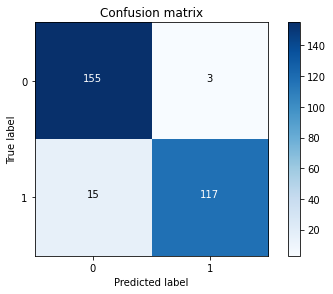

In [66]:
#KNN
knear_matrix = confusion_matrix(y_test,y_pred_knear)
np.set_printoptions(precision=2)

print("Recall metric of KNN model: ", knear_matrix[1,1]/(knear_matrix[1,0]+knear_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(knear_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric of Random Forest Model:  0.9015151515151515


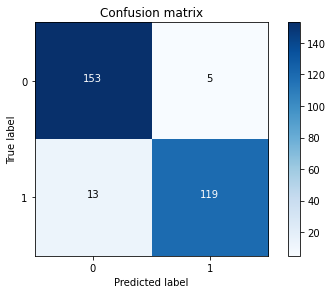

In [67]:
#Random Forest
forest_matrix = confusion_matrix(y_test,y_pred_forest)
np.set_printoptions(precision=2)

print("Recall metric of Random Forest Model: ", forest_matrix[1,1]/(forest_matrix[1,0]+forest_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(forest_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric of Decision Tree Model:  0.9090909090909091


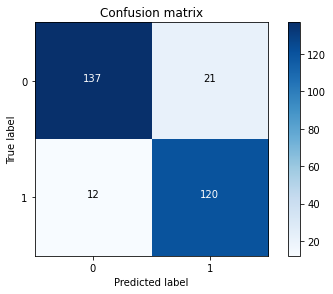

In [68]:
#Decision Tree
tree_matrix = confusion_matrix(y_test,y_pred_tree)
np.set_printoptions(precision=2)

print("Recall metric of Decision Tree Model: ", tree_matrix[1,1]/(tree_matrix[1,0]+tree_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(tree_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()